In [101]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Sinc Pulses

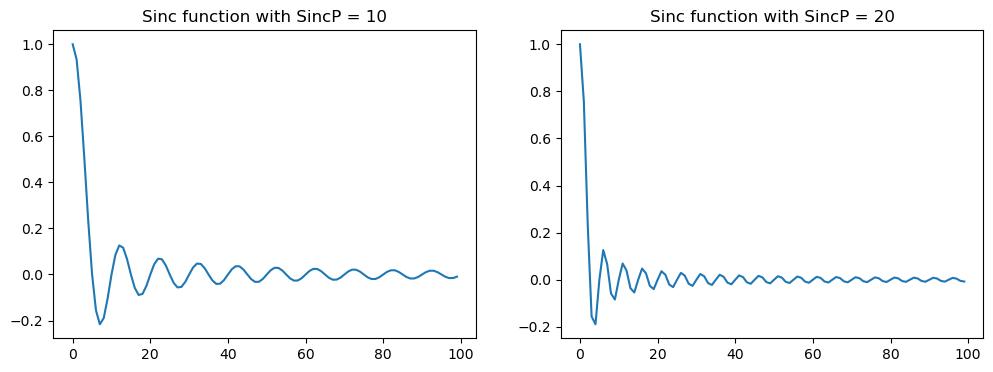

In [117]:
Nmics = 8
Nsamp = 100
src = (0, 0)
pitch = 0.1                 # Spacing between microphones
dist_per_samp = 0.01
C = 0.5                     # Speed of sound in the medium
SincP = 10.0                # Time dilation factor for sinc pulse
obstacle = (3, -1)

mics = [(0, (i-(Nmics-1)/2)*pitch) for i in range(Nmics)]   # Locations of microphones
t = np.array([i*dist_per_samp/C for i in range(Nsamp)])     # time instants with spacing of dist_per_samp


def dist(src, pt, mic):
    d1 = math.dist(src, pt)
    d2 = math.dist(pt, mic)
    return d1 + d2

def wsrc(t):
    return np.sinc(SincP*t)

def wsrc_(t):
    return np.sinc((SincP*2)*t)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
ax1.plot(wsrc(t))
ax1.set_title("Sinc function with SincP = 10")
ax2.plot(wsrc_(t))
ax2.set_title("Sinc function with SincP = 20")

plt.show()

### Microphone output from known Object

In [103]:
Nmics = 64
Nsamp = 200
src = (0, 0)
pitch = 0.1
dist_per_samp = 0.1
SincP = 5.0
C = 2.0
obstacle = (3, -1)
time_per_samp = dist_per_samp / C


mics = [(0, (i-(Nmics-1)/2)*pitch) for i in range(Nmics)]
t = np.arange(Nsamp) * dist_per_samp / C

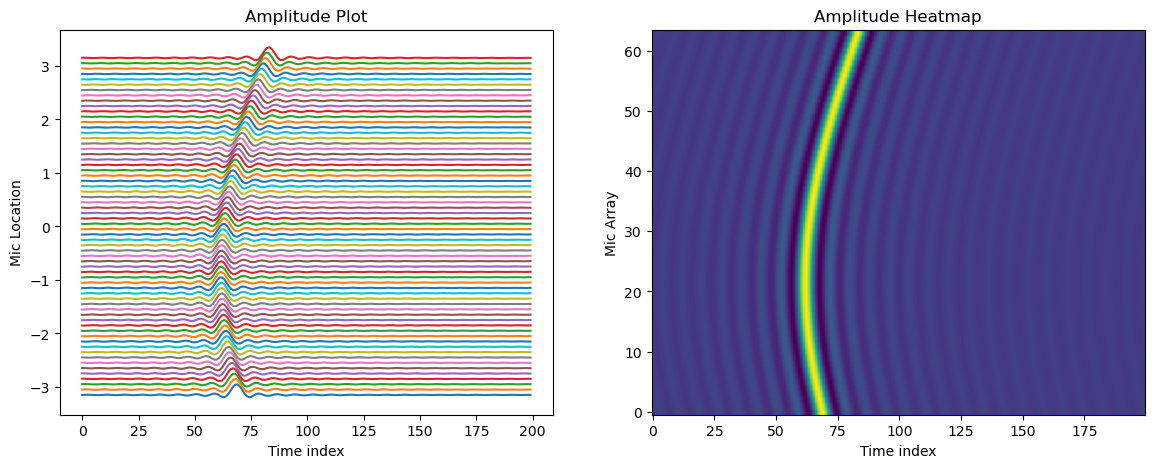

In [104]:
scale = 0.2  # Scaling the amplitude for plotting purpose

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 5))

# First subplot: Line plot
for mic in mics:
    amplitude = wsrc(t - dist(src, obstacle, mic) / C) * scale
    ax1.plot(amplitude + mic[1])
ax1.set_xlabel("Time index")
ax1.set_ylabel("Mic Location")
ax1.set_title("Amplitude Plot")

# Second subplot: Heatmap
heatmap_data = np.zeros((len(mics), len(t)))
for i, mic in enumerate(mics):
    for j, time in enumerate(t):
        amplitude = wsrc(time - dist(src, obstacle, mic) / C)
        heatmap_data[i, j] = amplitude

ax2.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
ax2.set_xlabel("Time index")
ax2.set_ylabel("Mic Array")
ax2.set_title("Amplitude Heatmap")

plt.show()

### Backcalculating to Find Position of Object

Text(0.5, 1.0, 'Reconstructed Image')

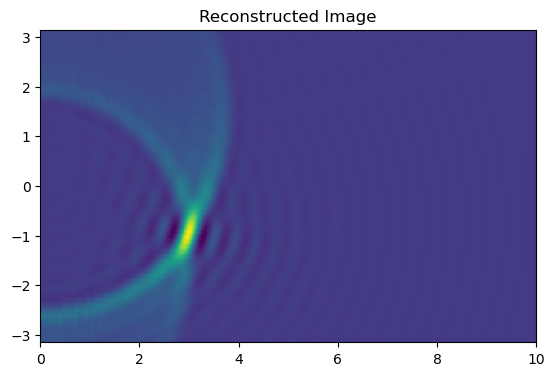

In [105]:
Y = np.linspace(mics[0][1], mics[Nmics-1][1], Nmics)
X = np.linspace(0, Nsamp * dist_per_samp / 2, Nsamp)            

heatmap_data = np.zeros((len(X), len(Y)))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        for mic in mics:
            time = dist(src, (x, y), mic) / C
            idx = np.searchsorted(t, time)
            heatmap_data[i, j] += wsrc(t[min(len(t)-1,idx)] - dist(src, obstacle, mic)/C)

plt.imshow( heatmap_data.T, cmap='viridis', origin='lower', extent=[X[0], X[-1], Y[0], Y[-1]])
plt.title("Reconstructed Image")

##### From the above, we can see that the maxima in intensity occurs at the point $(3, -1)$ which exactly matches the position of the object

### Now, Taking an Unknown Dataset

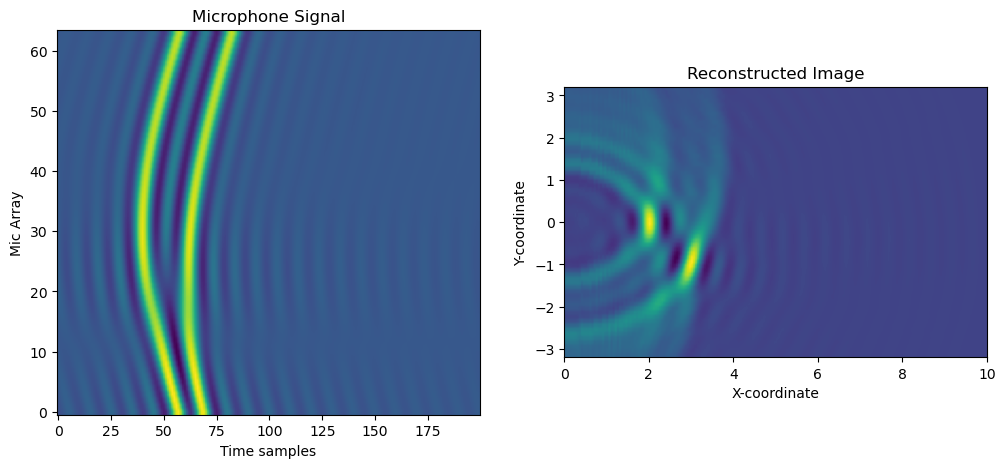

In [112]:
matrix = np.loadtxt('rx2.txt')

Nsamp = len(matrix[0])
Nmics = len(matrix)

Y = np.linspace(-Nmics * pitch / 2, Nmics * pitch / 2, Nmics)
X = np.linspace(0, Nsamp * dist_per_samp / 2, Nsamp)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_xlabel("Time samples")
ax1.set_ylabel("Mic Array")
ax1.set_title("Microphone Signal")
ax1.imshow(matrix, aspect='auto', cmap='viridis', origin='lower')


heatmap_data = np.zeros((Nsamp, Nmics))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        for k, mic in enumerate(matrix):
            time = dist(src, (x, y), (0, Y[k])) / C
            idx = min(math.floor(time / time_per_samp), len(mic) - 1)
            heatmap_data[i, j] += mic[idx]

ax2.imshow(heatmap_data.T, cmap='viridis', origin='lower', extent=[X[0], X[-1], Y[0], Y[-1]])
ax2.set_xlabel("X-coordinate")
ax2.set_title("Reconstructed Image")
ax2.set_ylabel("Y-coordinate")

plt.show()


##### From the above reconstructed image, we can say there are 2 objects present at $(2, 0)$ and $(3, -1)$

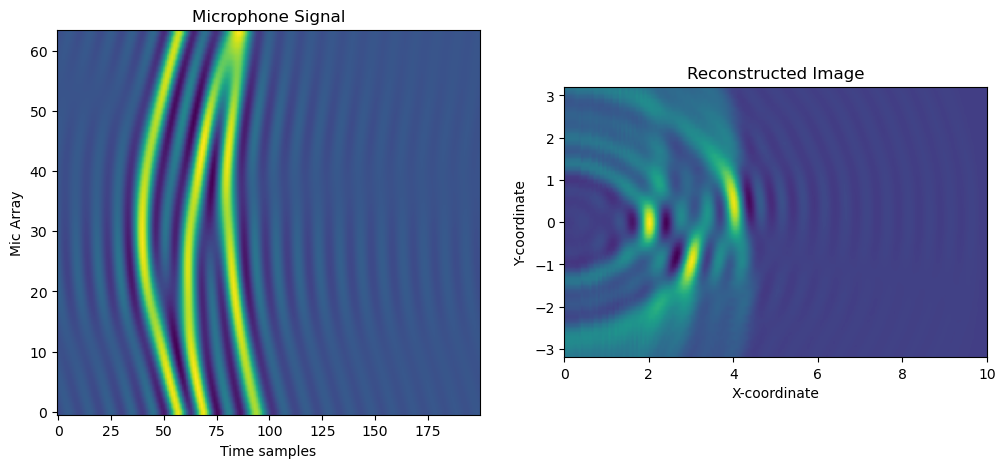

In [107]:
matrix = np.loadtxt('rx3.txt')

Nsamp = len(matrix[0])
Nmics = len(matrix)

Y = np.linspace(-Nmics * pitch / 2, Nmics * pitch / 2, Nmics)
X = np.linspace(0, Nsamp * dist_per_samp / 2, Nsamp)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.set_xlabel("Time samples")
ax1.set_ylabel("Mic Array")
ax1.set_title("Microphone Signal")
ax1.imshow(matrix, aspect='auto', cmap='viridis', origin='lower')


heatmap_data = np.zeros((Nsamp, Nmics))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        for k, mic in enumerate(matrix):
            time = dist(src, (x, y), (0, Y[k])) / C
            idx = min(math.floor(time / time_per_samp), len(mic) - 1)
            heatmap_data[i, j] += mic[idx]

ax2.imshow(heatmap_data.T, cmap='viridis', origin='lower', extent=[X[0], X[-1], Y[0], Y[-1]])
ax2.set_xlabel("X-coordinate")
ax2.set_title("Reconstructed Image")
ax2.set_ylabel("Y-coordinate")

plt.show()


##### From the above reconstructed image, we can say there are 3 objects present at (2, 0), (3, -1) and (4, 0.5) respectively

#### Varying $N_{mics}$ and $N_{samp}$ to Check the Quality of Images Obtained

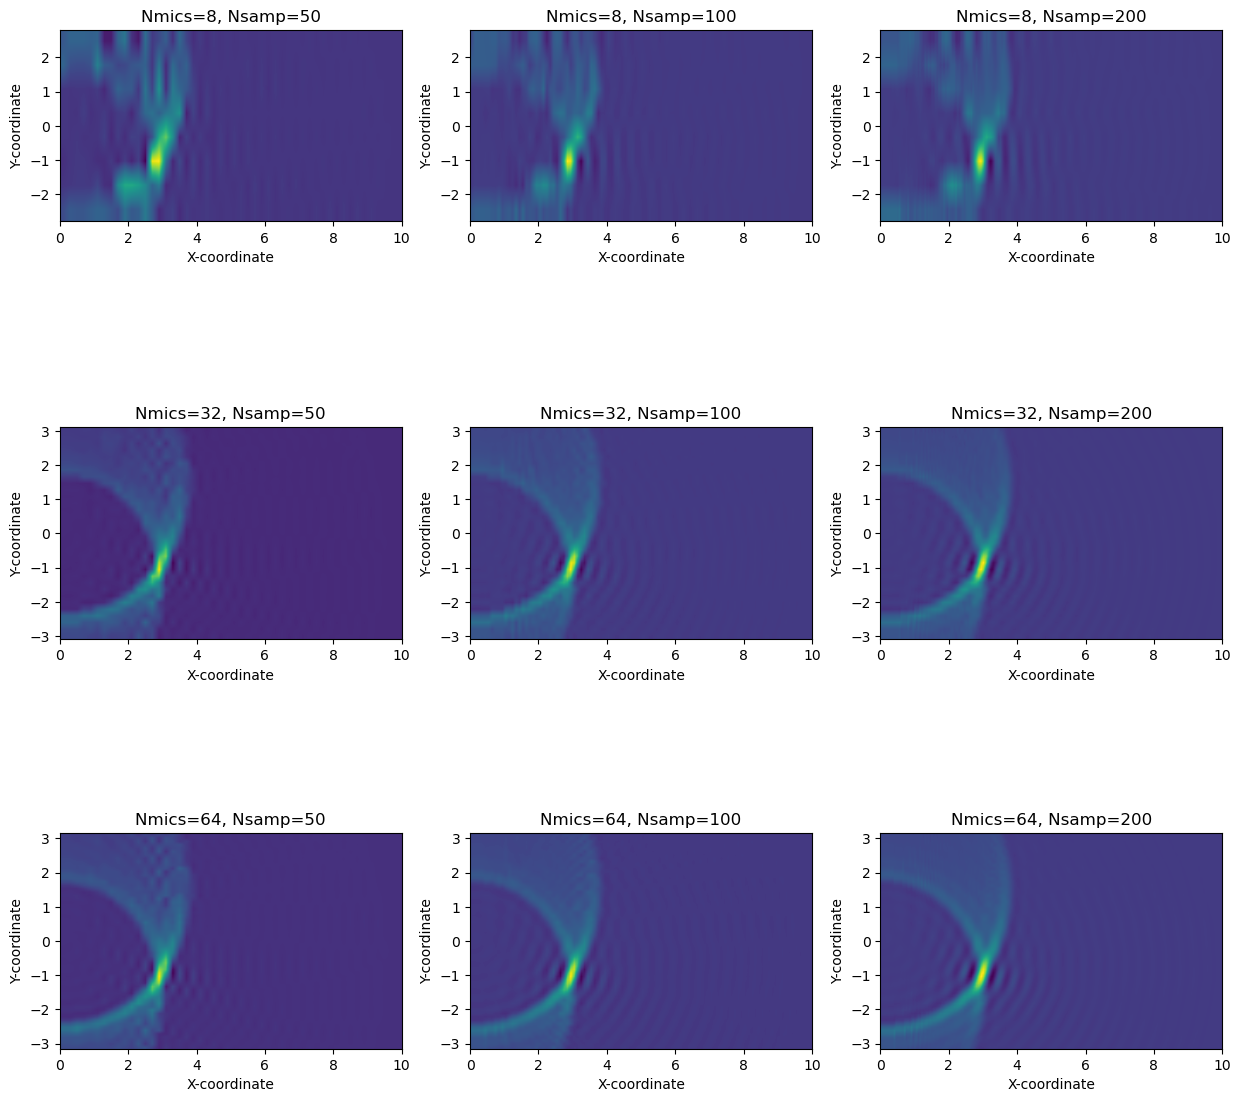

In [108]:
src = (0, 0)
SincP = 5.0
C = 2.0
obstacle = (3, -1)

# Define Nmics and Nsamp options
Nmics_options = [8, 32, 64]
Nsamp_options = [50, 100, 200]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, Nmics in enumerate(Nmics_options):
    for j, Nsamp in enumerate(Nsamp_options):
        
        pitch = 6.4 / Nmics
        dist_per_samp = 20 / Nsamp
        time_per_samp = dist_per_samp / C
        mics = [(0, (k - (Nmics - 1) / 2) * pitch) for k in range(Nmics)]
        t = np.arange(Nsamp) * dist_per_samp / C

        Y = np.linspace(mics[0][1], mics[Nmics - 1][1], Nmics)
        X = np.linspace(0, Nsamp * dist_per_samp / 2, Nsamp)
        
        # Initialize heatmap data
        heatmap_data = np.zeros((len(X), len(Y)))
        for xi, x in enumerate(X):
            for yi, y in enumerate(Y):
                for mic in mics:
                    time = dist(src, (x, y), mic) / C
                    idx = np.searchsorted(t, time)
                    heatmap_data[xi, yi] += wsrc(t[min(len(t) - 1, idx)] - dist(src, obstacle, mic) / C)

        # Plotting the heatmap for this combination
        ax = axes[i, j]
        cax = ax.imshow(heatmap_data.T, cmap='viridis', origin='lower', extent=[X[0], X[-1], Y[0], Y[-1]], interpolation='bilinear')
        ax.set_title(f"Nmics={Nmics}, Nsamp={Nsamp}")
        ax.set_xlabel("X-coordinate")
        ax.set_ylabel("Y-coordinate")

plt.show()


#### Varying C to check the Sharpness of the Image Obtained

Text(0.5, 1.0, 'Speed of wave = 1.0')

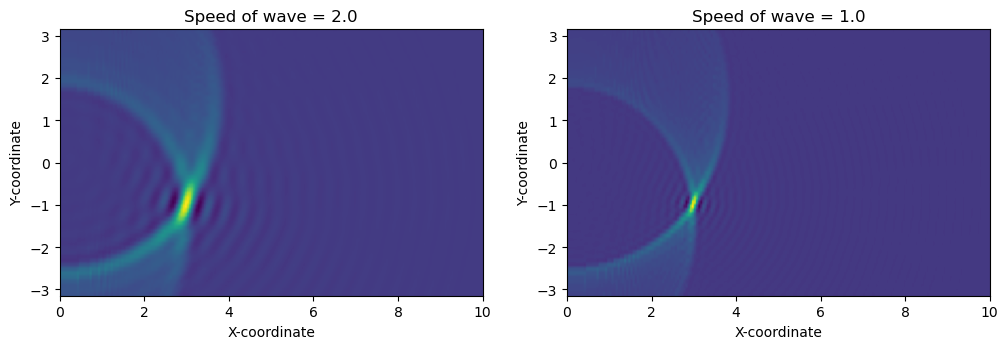

In [109]:
Nmics = 64
Nsamp = 200
src = (0, 0)
pitch = 0.1
dist_per_samp = 0.1
SincP = 5.0
C = 2.0
obstacle = (3, -1)
time_per_samp = dist_per_samp / C


mics = [(0, (i-(Nmics-1)/2)*pitch) for i in range(Nmics)]
t = np.arange(Nsamp) * dist_per_samp / C


Y = np.linspace(mics[0][1], mics[Nmics-1][1], Nmics)
X = np.linspace(0, Nsamp * dist_per_samp / 2, Nsamp)   

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

heatmap_data = np.zeros((len(X), len(Y)))
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        for mic in mics:
            time = dist(src, (x, y), mic) / C
            idx = np.searchsorted(t, time)
            heatmap_data[i, j] += wsrc(t[min(len(t)-1,idx)] - dist(src, obstacle, mic)/C)

ax1.imshow( heatmap_data.T, cmap='viridis', origin='lower', extent=[X[0], X[-1], Y[0], Y[-1]])
ax1.set_xlabel("X-coordinate")
ax1.set_ylabel("Y-coordinate")
ax1.set_title("Speed of wave = 2.0")


C = 1.0
time_per_samp = dist_per_samp / C
t = np.arange(Nsamp) * dist_per_samp / C
heatmap_data = np.zeros((len(X), len(Y)))

for i, x in enumerate(X):
    for j, y in enumerate(Y):
        for mic in mics:
            time = dist(src, (x, y), mic) / C
            idx = np.searchsorted(t, time)
            heatmap_data[i, j] += wsrc(t[min(len(t)-1,idx)] - dist(src, obstacle, mic)/C)

ax2.imshow( heatmap_data.T, cmap='viridis', origin='lower', extent=[X[0], X[-1], Y[0], Y[-1]])
ax2.set_xlabel("X-coordinate")
ax2.set_ylabel("Y-coordinate")
ax2.set_title("Speed of wave = 1.0")